In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("D:/Third Year/2025/ML/EDA/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA 

In [8]:
df.shape

(1338, 7)

In [10]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
df.describe()
#df['charges'].max()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df['age'].mean()

np.float64(39.20702541106129)

smoker
no     1064
yes     274
Name: count, dtype: int64

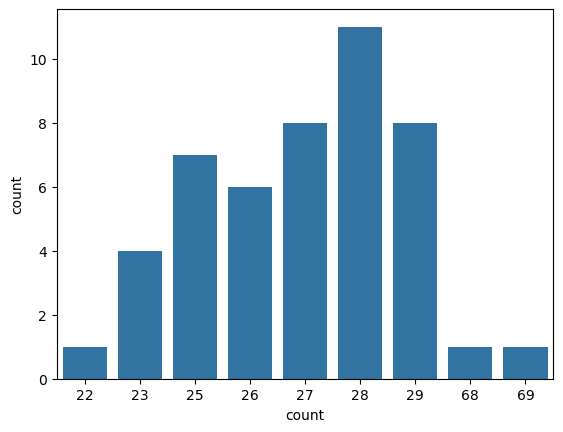

In [ ]:
df.value_counts()

count = df['age'].value_counts()
sns.countplot(x=count)
df['children'].unique()
df['smoker'].value_counts()

In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Visualizations** 

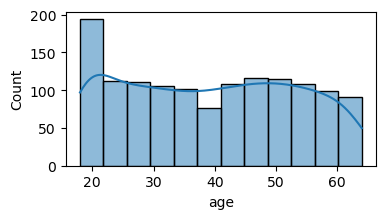

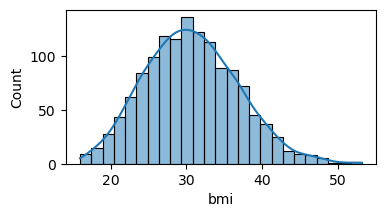

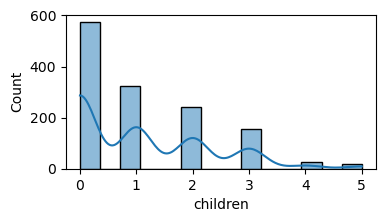

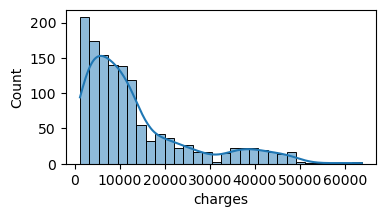

In [17]:

numeric_columns = ['age','bmi','children','charges'] 
for col in numeric_columns:
   plt.figure(figsize=(4,2))
   sns.histplot(x=df[col],kde=True)


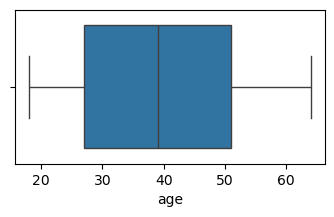

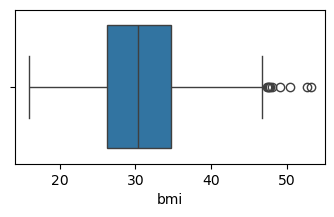

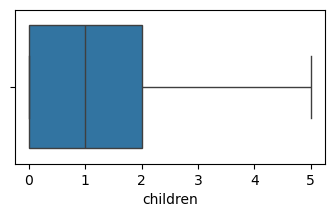

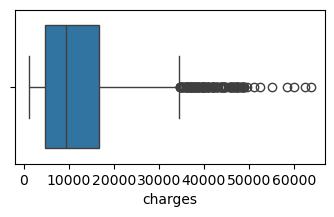

In [18]:
for col in numeric_columns: 
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])    

<Axes: >

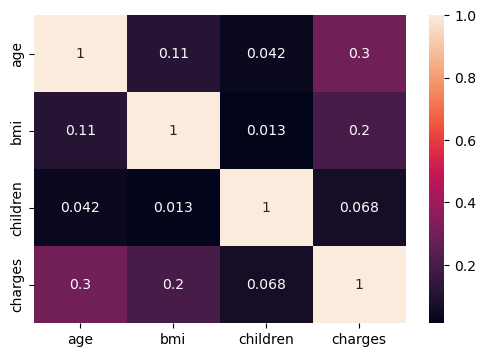

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

# Data Cleaning and Preprocessing

In [21]:
df_cleaned = df.copy()
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#df_cleaned.shape
df_cleaned.duplicated().sum()

np.int64(1)

In [23]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [24]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [25]:
# Replace male with 0 and female with 1 inside sex column (Perform Label encoding)

df_cleaned['sex'] = df_cleaned['sex'].replace({"male":0,"female":1})
df_cleaned.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [ ]:
# Replace yes with 1 and no with 0 inside smoker column

df_cleaned['smoker'] = df_cleaned['smoker'].replace({'yes':1,'no':0})
df_cleaned.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960


In [27]:
# Make bins for region Column to divide into: southwest, southeast, northwest

df_cleaned = pd.get_dummies(data=df_cleaned, columns=['region'], drop_first=True)

columns = ['region_northwest', 'region_southeast', 'region_southwest']
for col in columns: 
   df_cleaned[col] = df_cleaned[col].astype(int) 
    
df_cleaned.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


# Feature Engineering and Extraction

In [28]:
df_cleaned.rename(columns=({'sex':'is_female', 'smoker':'is_smoker'}), inplace=True)

In [29]:
# Create bins to make the ranges of bmi on which to decide whether person is underwieght, normal, overweight, or obese 

bmi_bins = [-float('inf'), 18.5, 25, 30, float('inf')]
bmi_labels = ['underweight', 'normal', 'overweight', 'obese']

df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,1,overweight
1,18,0,33.770,1,0,1725.55230,0,1,0,obese
2,28,0,33.000,3,0,4449.46200,0,1,0,obese
3,33,0,22.705,0,0,21984.47061,1,0,0,normal
4,32,0,28.880,0,0,3866.85520,1,0,0,overweight


In [30]:
# Create new columns named as : underwieght_bmi, normal_bmi, overweight_bmi, and obese_bmi 

df_cleaned = pd.get_dummies(data=df_cleaned, columns=['bmi_category'], drop_first=True)

bmi_columns = ['bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']
for col in bmi_columns: 
    df_cleaned[col] = df_cleaned[col].astype(int)
    
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,1,0,0,0,1
3,33,0,22.705,0,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler() 
df_cleaned[['age','bmi','children']] = scaler.fit_transform(df_cleaned[['age','bmi','children']])
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0,1,0,1,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,0,1,0,0,0,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,0,1,0,0,0,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,1,0,0,1,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,1,0,0,0,1,0


# Creating ML Model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Model Performance Testing**

*Linear Regression Model's performance is tested using R^2 test and Adjusted R^2 test.*

-> R^2 = 1-(sum of residuals/ sum of total) => 1-((Σ(y*i - y^ *i)^2) / (Σ(y*i - y^-)^2)) 
     => The result will always be positive and in decimal

-> Adjusted R^2 = 1-((1-r2)*(n-1)/(n-p-1)) 
     => where: 
         n = number of rows
         p = number of feautures(Columns)

In [39]:
y_predict = model.predict(X_test)
y_predict

array([ 8.27594475e+03,  5.15852242e+03,  1.45510994e+04,  3.25017096e+04,
        8.92287539e+03,  1.33042575e+04,  3.06660988e+04,  1.07260377e+03,
        1.12384126e+04,  9.95338674e+03,  1.07567578e+04,  3.20749075e+04,
        3.20814581e+04,  1.56166779e+04,  1.06356325e+04,  8.15544306e+03,
        5.27020957e+03,  3.24937375e+04,  3.02479779e+03,  3.85858428e+03,
        4.86100564e+03,  2.91679254e+04,  1.37065623e+04,  2.91931292e+04,
        3.15256538e+04,  6.44052026e+03,  3.49130288e+04,  3.76616998e+04,
        1.30807232e+04,  1.46868751e+04,  8.12348286e+03,  1.29848758e+04,
        5.47913974e+02,  1.09924178e+04,  3.72472560e+04,  1.30609332e+04,
        3.42307477e+03,  4.65404269e+03,  3.15644180e+04,  7.95112662e+03,
        6.46470314e+03,  3.08651368e+04,  3.53443403e+04,  1.36002381e+04,
        8.06100662e+03,  2.77388754e+03,  5.50897107e+03,  7.27251406e+03,
        3.59495086e+03,  1.05075025e+04,  7.90880562e+03,  1.07676000e+04,
        3.07881535e+04,  

In [40]:
from sklearn.metrics import r2_score

In [41]:
# R^2 
r2 = r2_score(y_test, y_predict)


n = X_test.shape[0]
p = X_test.shape[1]

# Adjusted R^2
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7940317797681985

**Overfitting & underfitting**

Overfittting:- Model Performs better during Training(Low bias) but doesnot perform good during Testing(High Variation).

Good Model:- Model Performs better during Training as well as during Testing.

underfitting:- Model neither performs better during Training neither performs good during Testing.

Ridge and Lasso Regression are used for to avoid overfitting or underfitting